In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import joblib
from matplotlib.ticker import FixedLocator

import os
path_dir = os.path.dirname(os.getcwd())

cv_cause_results = pd.read_csv(os.path.join(path_dir, "cv cause\\result.csv"))
display(cv_cause_results)
all_cause_results = pd.read_csv(os.path.join(path_dir, "all cause\\result.csv"))
display(all_cause_results)
clinical_scores_results = pd.read_csv(os.path.join( "clinical_scores.csv"))
display(clinical_scores_results)


,Timeframe,Months,No_total_hospitalizations,No_unique_patients,No_total_events,No_training_hospitalizations,No_training_patients,No_training_events,No_validation_hospitalizations,No_validation_patients,...,upper_pr_validation,Youden cut-off,MCC train,MCC validation,F1 train,F1 validation,BS train,BS validation,BSS train,BSS validation
0,0.5y,6,7141,5756,149,4981,4027,104,2160,1729,...,0.290536,0.118593,0.420282,0.242464,0.428184,0.283465,0.047416,0.045940,0.183712,0.127714
1,1y,12,6683,5380,241,4651,3755,175,2032,1625,...,0.385922,0.115767,0.452103,0.370600,0.479310,0.422907,0.067360,0.072463,0.236592,0.162033
2,1.5y,18,6206,4988,330,4318,3476,231,1888,1512,...,0.428310,0.153816,0.489744,0.392829,0.555725,0.470588,0.082473,0.086639,0.303094,0.199653
3,2y,24,5847,4693,397,4073,3276,280,1774,1417,...,0.438742,0.126877,0.520206,0.412540,0.591716,0.492401,0.089675,0.097228,0.357898,0.202435
4,2.5y,32,5487,4395,472,3826,3067,339,1661,1328,...,0.498605,0.225784,0.599601,0.390736,0.681934,0.508039,0.095631,0.113255,0.394914,0.216606
5,3y,36,5235,4185,543,3651,2920,386,1584,1265,...,0.554595,0.216724,0.584638,0.448667,0.681576,0.573684,0.103411,0.123867,0.405006,0.245869
6,3.5y,42,4943,3954,612,3447,2757,432,1496,1197,...,0.612156,0.230650,0.601199,0.442356,0.706587,0.587952,0.109153,0.132772,0.417853,0.270089
7,4y,48,4515,3623,666,3142,2522,470,1373,1101,...,0.661298,0.239116,0.614470,0.486690,0.722736,0.637931,0.107130,0.141437,0.452328,0.286133
8,4.5y,54,4004,3235,722,2772,2241,507,1232,994,...,0.718154,0.356894,0.685807,0.536509,0.777887,0.669746,0.104978,0.137927,0.491871,0.329452
9,5y,60,3521,2855,765,2425,1969,534,1096,886,...,0.734239,0.301975,0.675575,0.512494,0.779310,0.674556,0.104923,0.145528,0.505002,0.326788


,Timeframe,Months,No_total_hospitalizations,No_unique_patients,No_total_events,No_training_hospitalizations,No_training_patients,No_training_events,No_validation_hospitalizations,No_validation_patients,...,upper_pr_validation,Youden cut-off,MCC train,MCC validation,F1 train,F1 validation,BS train,BS validation,BSS train,BSS validation
0,0.5y,6,7186,5797,194,5014,4057,137,2172,1740,...,0.201613,0.031587,0.296240,0.249077,0.300417,0.252809,0.047947,0.057502,0.253097,0.056785
1,1y,12,6766,5455,324,4712,3809,236,2054,1646,...,0.406997,0.060885,0.398370,0.336698,0.454787,0.400000,0.074053,0.079542,0.268183,0.193827
2,1.5y,18,6317,5086,441,4398,3544,311,1919,1542,...,0.470538,0.078259,0.462674,0.411531,0.539273,0.514706,0.092373,0.115854,0.271375,0.162779
3,2y,24,5988,4811,538,4175,3358,382,1813,1453,...,0.543658,0.161532,0.533392,0.470208,0.621064,0.587112,0.090824,0.121314,0.389111,0.251084
4,2.5y,32,5677,4551,662,3961,3175,474,1716,1376,...,0.600729,0.220005,0.553767,0.482866,0.662226,0.616740,0.105479,0.130587,0.400226,0.284453
5,3y,36,5456,4364,764,3804,3042,539,1652,1322,...,0.670684,0.326600,0.598717,0.537233,0.709620,0.669405,0.110463,0.130800,0.432666,0.339897
6,3.5y,42,5200,4157,869,3624,2896,609,1576,1261,...,0.733150,0.249944,0.574018,0.546370,0.711816,0.697368,0.117325,0.133223,0.443397,0.374902
7,4y,48,4809,3856,960,3341,2679,669,1468,1177,...,0.759625,0.311000,0.593427,0.550264,0.734088,0.713826,0.123544,0.141901,0.442667,0.371903
8,4.5y,54,4319,3483,1037,2987,2409,722,1332,1074,...,0.786553,0.493715,0.635421,0.534950,0.758671,0.692042,0.123887,0.145544,0.462554,0.373797
9,5y,60,3871,3130,1115,2665,2155,774,1206,975,...,0.804314,0.502082,0.640762,0.543645,0.771906,0.710611,0.126149,0.146715,0.469543,0.383297


,Score,Type,Timeframe,Months,auc_roc,lower_roc,upper_roc,auc_pr,lower_pr,upper_pr,Youden cut-off,MCC,F1,BS
0,ACEF,cv,0.5y,6,0.764,0.736,0.792,0.091,0.085,0.096,1.6,0.143,0.097,0.071
1,ACEF,cv,1y,12,0.759,0.735,0.781,0.158,0.154,0.162,1.6,0.178,0.155,0.076
2,ACEF,cv,1.5y,18,0.761,0.741,0.780,0.233,0.230,0.236,1.6,0.212,0.214,0.082
3,ACEF,cv,2y,24,0.765,0.748,0.785,0.273,0.270,0.275,1.6,0.240,0.260,0.087
4,ACEF,cv,2.5y,30,0.760,0.742,0.778,0.328,0.321,0.329,1.6,0.266,0.309,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,baseline_pr,cv,4y,48,0.000,0.000,0.000,0.193,0.000,0.000,0.0,0.000,0.000,0.000
116,baseline_pr,cv,4.5y,54,0.000,0.000,0.000,0.230,0.000,0.000,0.0,0.000,0.000,0.000
117,baseline_pr,cv,5y,60,0.000,0.000,0.000,0.270,0.000,0.000,0.0,0.000,0.000,0.000
118,baseline_pr,cv,5.5y,66,0.000,0.000,0.000,0.325,0.000,0.000,0.0,0.000,0.000,0.000


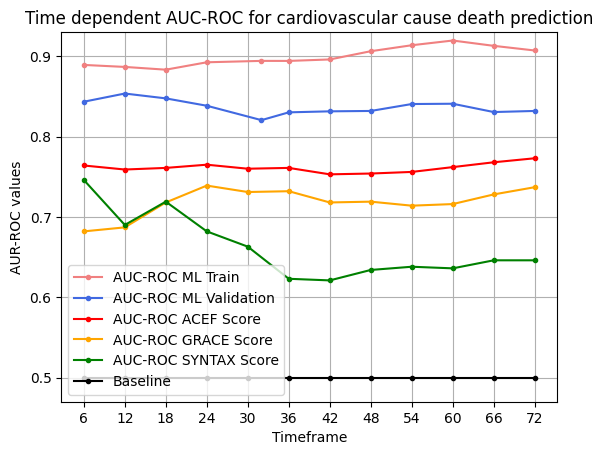

In [2]:
df = cv_cause_results
ACEF_score_df = clinical_scores_results[(clinical_scores_results['Score'] == 'ACEF') & (clinical_scores_results['Type'] == 'cv')]
GRACE_score_df = clinical_scores_results[(clinical_scores_results['Score'] == 'GRACE') & (clinical_scores_results['Type'] == 'cv')]
SYNTAX_score_df = clinical_scores_results[(clinical_scores_results['Score'] == 'SYNTAX') & (clinical_scores_results['Type'] == 'cv')]

baseline = clinical_scores_results[(clinical_scores_results['Score'] == 'baseline_roc') & (clinical_scores_results['Type'] == 'cv')]


plt.plot(df['Months'], df['auc_roc_train'], marker='.', label='AUC-ROC ML Train', color='lightcoral')
#plt.plot(df['Months'], df['lower_roc_train'], linestyle='dashed', label='Lower CI', color='lightcoral')
#plt.plot(df['Months'], df['upper_roc_train'], linestyle='dashed', label='Upper CI', color='lightcoral')
#plt.fill_between(df['Months'], df['lower_roc_train'], df['upper_roc_train'], color='lightcoral', alpha=0.5)


plt.plot(df['Months'], df['auc_roc_validation'], marker='.', label='AUC-ROC ML Validation', color='royalblue')
#plt.plot(df['Months'], df['lower_roc_validation'], linestyle='dashed', label='Lower CI', color='royalblue')
#plt.plot(df['Months'], df['upper_roc_validation'], linestyle='dashed', label='Upper CI', color='royalblue')
#plt.fill_between(df['Months'], df['lower_roc_validation'], df['upper_roc_validation'], color='royalblue', alpha=0.5)

plt.plot(ACEF_score_df['Months'], ACEF_score_df['auc_roc'], marker='.', label='AUC-ROC ACEF Score', color='red')
plt.plot(GRACE_score_df['Months'], GRACE_score_df['auc_roc'], marker='.', label='AUC-ROC GRACE Score', color='orange')
plt.plot(SYNTAX_score_df['Months'], SYNTAX_score_df['auc_roc'], marker='.', label='AUC-ROC SYNTAX Score', color='green')

plt.plot(baseline['Months'], baseline['auc_roc'], marker='.', label='Baseline', color='black')

plt.ylim(0.47, 0.93)

plt.xlabel('Timeframe')
plt.ylabel('AUR-ROC values')
plt.title('Time dependent AUC-ROC for cardiovascular cause death prediction')
plt.legend()

locator = FixedLocator([6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72])
plt.gca().xaxis.set_major_locator(locator)

plt.grid(True)
plt.show()

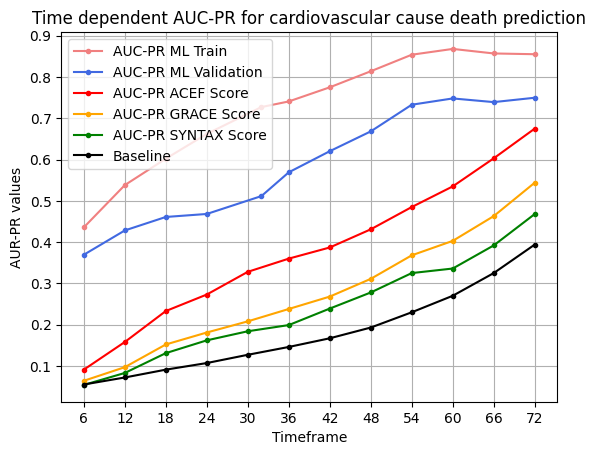

In [3]:
baseline_pr = clinical_scores_results[(clinical_scores_results['Score'] == 'baseline_pr') & (clinical_scores_results['Type'] == 'cv')]

plt.plot(df['Months'], df['auc_pr_train'], marker='.', label='AUC-PR ML Train', color='lightcoral')

#plt.plot(df['Months'], df['lower_pr_train'], linestyle='dashed', label='Lower CI', color='lightcoral')
#plt.plot(df['Months'], df['upper_pr_train'], linestyle='dashed', label='Upper CI', color='lightcoral')
#plt.fill_between(df['Months'], df['lower_pr_train'], df['upper_pr_train'], color='lightcoral', alpha=0.5)

plt.plot(df['Months'], df['auc_pr_validation'], marker='.', label='AUC-PR ML Validation', color='royalblue')
#plt.plot(df['Months'], df['lower_pr_validation'], linestyle='dashed', label='Lower CI', color='royalblue')
#plt.plot(df['Months'], df['upper_pr_validation'], linestyle='dashed', label='Upper CI', color='royalblue')
#plt.fill_between(df['Months'], df['lower_pr_validation'], df['upper_pr_validation'], color='royalblue', alpha=0.5)

plt.plot(ACEF_score_df['Months'], ACEF_score_df['auc_pr'], marker='.', label='AUC-PR ACEF Score', color='red')
plt.plot(GRACE_score_df['Months'], GRACE_score_df['auc_pr'], marker='.', label='AUC-PR GRACE Score', color='orange')
plt.plot(SYNTAX_score_df['Months'], SYNTAX_score_df['auc_pr'], marker='.', label='AUC-PR SYNTAX Score', color='green')
plt.plot(baseline_pr['Months'], baseline_pr['auc_pr'], marker='.', label='Baseline', color='black')

plt.xlabel('Timeframe')
plt.ylabel('AUR-PR values')
plt.title('Time dependent AUC-PR for cardiovascular cause death prediction')
plt.legend()

locator = FixedLocator([6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72])
plt.gca().xaxis.set_major_locator(locator)

plt.grid(True)
plt.show()


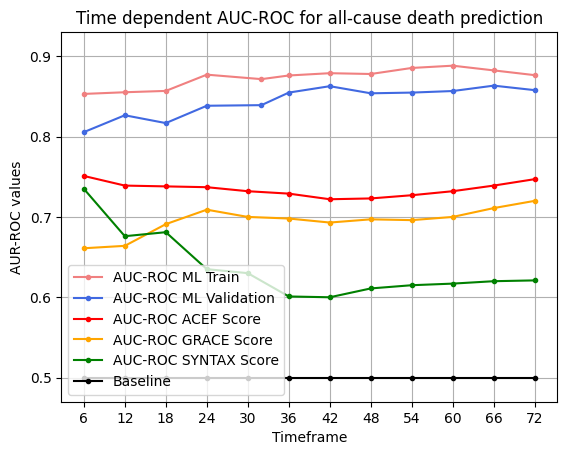

In [4]:
df = all_cause_results
ACEF_score_df = clinical_scores_results[(clinical_scores_results['Score'] == 'ACEF') & (clinical_scores_results['Type'] == 'all')]
GRACE_score_df = clinical_scores_results[(clinical_scores_results['Score'] == 'GRACE') & (clinical_scores_results['Type'] == 'all')]
SYNTAX_score_df = clinical_scores_results[(clinical_scores_results['Score'] == 'SYNTAX') & (clinical_scores_results['Type'] == 'all')]
baseline = clinical_scores_results[(clinical_scores_results['Score'] == 'baseline_roc') & (clinical_scores_results['Type'] == 'all')]

plt.plot(df['Months'], df['auc_roc_train'], marker='.', label='AUC-ROC ML Train', color='lightcoral')
#plt.plot(df['Months'], df['lower_roc_train'], linestyle='dashed', label='Lower CI', color='lightcoral')
#plt.plot(df['Months'], df['upper_roc_train'], linestyle='dashed', label='Upper CI', color='lightcoral')
#plt.fill_between(df['Months'], df['lower_roc_train'], df['upper_roc_train'], color='lightcoral', alpha=0.5)


plt.plot(df['Months'], df['auc_roc_validation'], marker='.', label='AUC-ROC ML Validation', color='royalblue')
#plt.plot(df['Months'], df['lower_roc_validation'], linestyle='dashed', label='Lower CI', color='royalblue')
#plt.plot(df['Months'], df['upper_roc_validation'], linestyle='dashed', label='Upper CI', color='royalblue')
#plt.fill_between(df['Months'], df['lower_roc_validation'], df['upper_roc_validation'], color='royalblue', alpha=0.5)

plt.plot(ACEF_score_df['Months'], ACEF_score_df['auc_roc'], marker='.', label='AUC-ROC ACEF Score', color='red')
plt.plot(GRACE_score_df['Months'], GRACE_score_df['auc_roc'], marker='.', label='AUC-ROC GRACE Score', color='orange')
plt.plot(SYNTAX_score_df['Months'], SYNTAX_score_df['auc_roc'], marker='.', label='AUC-ROC SYNTAX Score', color='green')
plt.plot(baseline['Months'], baseline['auc_roc'], marker='.', label='Baseline', color='black')

plt.xlabel('Timeframe')
plt.ylabel('AUR-ROC values')
plt.title('Time dependent AUC-ROC for all-cause death prediction')
plt.legend()
plt.ylim(0.47, 0.93)

locator = FixedLocator([6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72])
plt.gca().xaxis.set_major_locator(locator)

plt.grid(True)
plt.show()


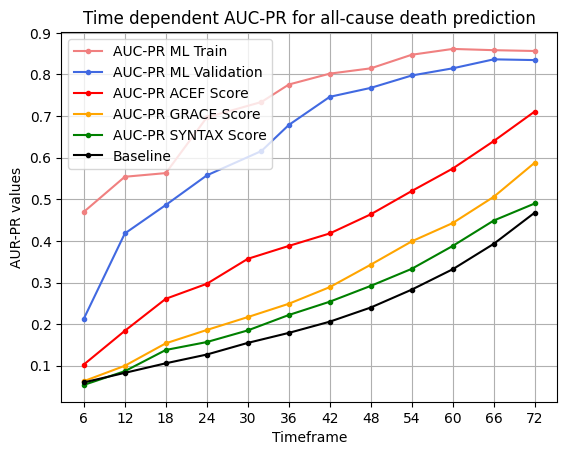

In [5]:
baseline_pr = clinical_scores_results[(clinical_scores_results['Score'] == 'baseline_pr') & (clinical_scores_results['Type'] == 'all')]

plt.plot(df['Months'], df['auc_pr_train'], marker='.', label='AUC-PR ML Train', color='lightcoral')

#plt.plot(df['Months'], df['lower_pr_train'], linestyle='dashed', label='Lower CI', color='lightcoral')
#plt.plot(df['Months'], df['upper_pr_train'], linestyle='dashed', label='Upper CI', color='lightcoral')
#plt.fill_between(df['Months'], df['lower_pr_train'], df['upper_pr_train'], color='lightcoral', alpha=0.5)

plt.plot(df['Months'], df['auc_pr_validation'], marker='.', label='AUC-PR ML Validation', color='royalblue')
#plt.plot(df['Months'], df['lower_pr_validation'], linestyle='dashed', label='Lower CI', color='royalblue')
#plt.plot(df['Months'], df['upper_pr_validation'], linestyle='dashed', label='Upper CI', color='royalblue')
#plt.fill_between(df['Months'], df['lower_pr_validation'], df['upper_pr_validation'], color='royalblue', alpha=0.5)

plt.plot(ACEF_score_df['Months'], ACEF_score_df['auc_pr'], marker='.', label='AUC-PR ACEF Score', color='red')
plt.plot(GRACE_score_df['Months'], GRACE_score_df['auc_pr'], marker='.', label='AUC-PR GRACE Score', color='orange')
plt.plot(SYNTAX_score_df['Months'], SYNTAX_score_df['auc_pr'], marker='.', label='AUC-PR SYNTAX Score', color='green')
plt.plot(baseline_pr['Months'], baseline_pr['auc_pr'], marker='.', label='Baseline', color='black')

plt.xlabel('Timeframe')
plt.ylabel('AUR-PR values')
plt.title('Time dependent AUC-PR for all-cause death prediction')
plt.legend()

locator = FixedLocator([6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72])
plt.gca().xaxis.set_major_locator(locator)

plt.grid(True)
plt.show()